## Importing Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

### Dataset

In [2]:
df = pd.read_csv("time-series-19-covid-combined.csv")
df

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.939110,67.709953,0,0.0,0
1,2020-01-23,Afghanistan,NaN,33.939110,67.709953,0,0.0,0
2,2020-01-24,Afghanistan,NaN,33.939110,67.709953,0,0.0,0
3,2020-01-25,Afghanistan,NaN,33.939110,67.709953,0,0.0,0
4,2020-01-26,Afghanistan,NaN,33.939110,67.709953,0,0.0,0
...,...,...,...,...,...,...,...,...
72085,2020-10-13,Zimbabwe,NaN,-19.015438,29.154857,8036,7632.0,230
72086,2020-10-14,Zimbabwe,NaN,-19.015438,29.154857,8055,7640.0,231
72087,2020-10-15,Zimbabwe,NaN,-19.015438,29.154857,8075,7669.0,231
72088,2020-10-16,Zimbabwe,NaN,-19.015438,29.154857,8099,7673.0,231


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
covid =df.copy()

It consists of columns:

- Date : From 22/01/2020 to the current date
- Country/Region : Countries affected by Covid-19
- Province/State : Specific states in the Country
- Lat : Latitude of the Country
- Long : Longitude of the Country
- Confirmed : Total Number of Confirmed Cases per day
- Recovered : Total Number of Recovery Cases per day
- Deaths : Total Number of Death Cases per day

### Comparison with SAARC countries

In [8]:
saarc_countries = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']
saarc_data = df[df['Country/Region'].isin(saarc_countries)]

In [9]:
saarc_data

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.939110,67.709953,0,0.0,0
1,2020-01-23,Afghanistan,NaN,33.939110,67.709953,0,0.0,0
2,2020-01-24,Afghanistan,NaN,33.939110,67.709953,0,0.0,0
3,2020-01-25,Afghanistan,NaN,33.939110,67.709953,0,0.0,0
4,2020-01-26,Afghanistan,NaN,33.939110,67.709953,0,0.0,0
...,...,...,...,...,...,...,...,...
61825,2020-10-13,Sri Lanka,NaN,7.873054,80.771797,5038,3328.0,13
61826,2020-10-14,Sri Lanka,NaN,7.873054,80.771797,5170,3357.0,13
61827,2020-10-15,Sri Lanka,NaN,7.873054,80.771797,5244,3380.0,13
61828,2020-10-16,Sri Lanka,NaN,7.873054,80.771797,5354,3385.0,13


### Afghanistan

In [10]:
afghanistan = saarc_data[saarc_data['Country/Region'] == 'Afghanistan']['Confirmed']
afghanistan

0          0
1          0
2          0
3          0
4          0
       ...  
265    39928
266    39994
267    40026
268    40073
269    40141
Name: Confirmed, Length: 270, dtype: int64

In [17]:
# Function to check stationarity using Dickey-Fuller test
def check_stationarity(data):
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

In [19]:
# Check stationarity of Afghanistan data
print('\nStationarity Test for Afghanistan Data:')
check_stationarity(afghanistan)


Stationarity Test for Afghanistan Data:
ADF Statistic: -0.9586833979786269
p-value: 0.7680338623232843
Critical Values:
	1%: -3.4564641849494113
	5%: -2.873032730098417
	10%: -2.572894516864816


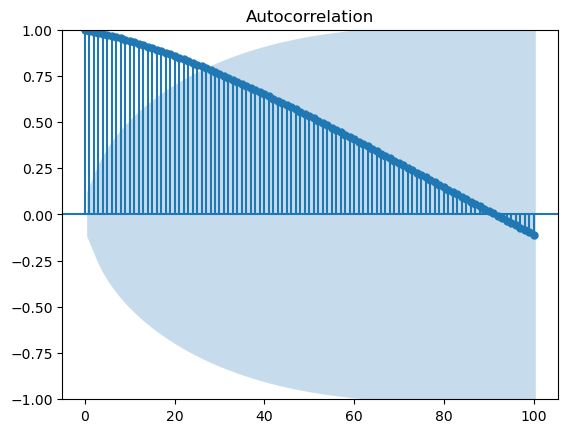

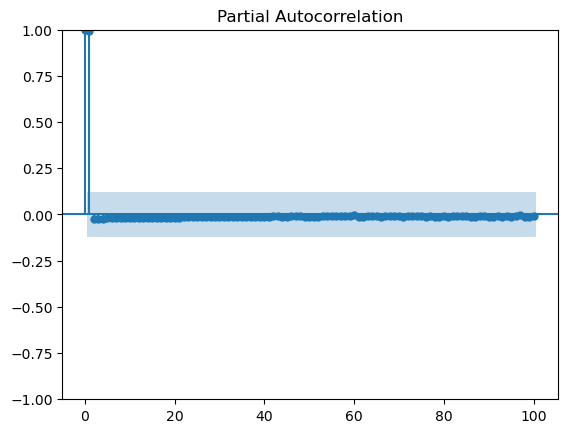

In [20]:
# Plot ACF and PACF
plot_acf(afghanistan,lags=100)
plot_pacf(afghanistan,lags=100)
plt.show()

In [22]:
# Split the data into train and test sets
split_ratio = 0.8
split_index = int(len(afghanistan) * split_ratio)
train_data, test_data = afghanistan[:split_index], afghanistan[split_index:]

In [23]:
# Set the lag value
lag_value = 6

# Fit the AR model
model_afghanistan = AutoReg(train_data, lags=lag_value)
model_fit_afghanistan = model_afghanistan.fit()

In [25]:
print(model_fit_afghanistan.summary())

                            AutoReg Model Results                             
Dep. Variable:              Confirmed   No. Observations:                  216
Model:                     AutoReg(6)   Log Likelihood               -1198.264
Method:               Conditional MLE   S.D. of innovations             72.754
Date:                Tue, 30 Apr 2024   AIC                           2412.527
Time:                        10:40:19   BIC                           2439.304
Sample:                             6   HQIC                          2423.352
                                  216                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           14.3553      7.357      1.951      0.051      -0.063      28.774
Confirmed.L1     1.2847      0.067     19.260      0.000       1.154       1.415
Confirmed.L2    -0.1433      0.111     -1.29

In [26]:
# Make predictions
n_train_afghanistan = len(train_data)  
n_test_afghanistan = len(test_data)
predictions_afghanistan = model_fit_afghanistan.predict(start=n_train_afghanistan, end=n_train_afghanistan + n_test_afghanistan-1, dynamic=False)

In [28]:
predictions_afghanistan.head()

216    38138.164633
217    38174.616023
218    38207.131384
219    38234.794740
220    38257.603139
dtype: float64

In [29]:
residual_afganistan = test_data - predictions_afghanistan
residual_afganistan

216     -68.164633
217     -61.616023
218     -78.131384
219     -94.794740
220    -114.603139
221    -117.367582
222    -121.230936
223     -90.157078
224     -36.919157
225      21.218909
226      56.581345
227     104.585569
228     213.770814
229     351.820010
230     426.985497
231     507.137260
232     598.663218
233     703.273502
234     815.857769
235     975.458713
236    1123.026248
237    1264.591334
238    1410.067506
239    1539.395093
240    1669.549138
241    1831.482342
242    2089.157785
243    2258.517296
244    2426.505320
245    2628.072356
246    2812.162536
247    2993.719677
248    3171.682527
249    3384.988647
250    3575.575343
251    3787.377091
252    3998.326661
253    4218.354471
254    4432.389221
255    4654.358128
256    4919.186415
257    5226.797544
258    5523.113158
259    5823.053201
260    6134.535987
261    6460.478126
262    6724.794583
263    7080.398706
264    7416.202264
265    7744.115489
266    8085.047080
267    8396.904247
268    8728.

Text(0, 0.5, 'Error')

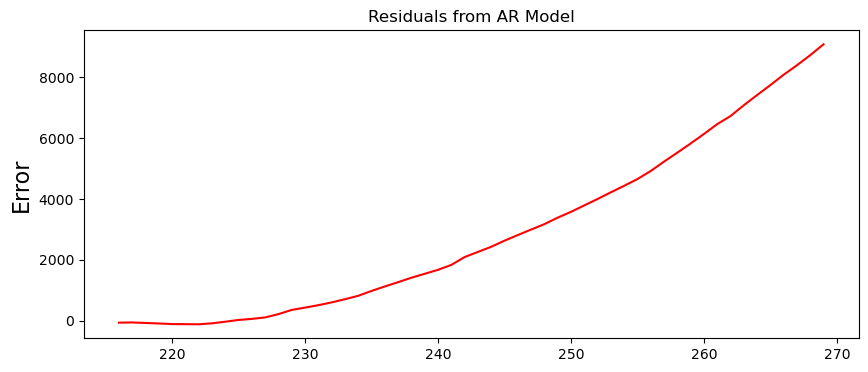

In [32]:
plt.figure(figsize=(10,4))
plt.plot(residual_afganistan,color='r')
plt.title("Residuals from AR Model")
plt.ylabel('Error',fontsize=16)

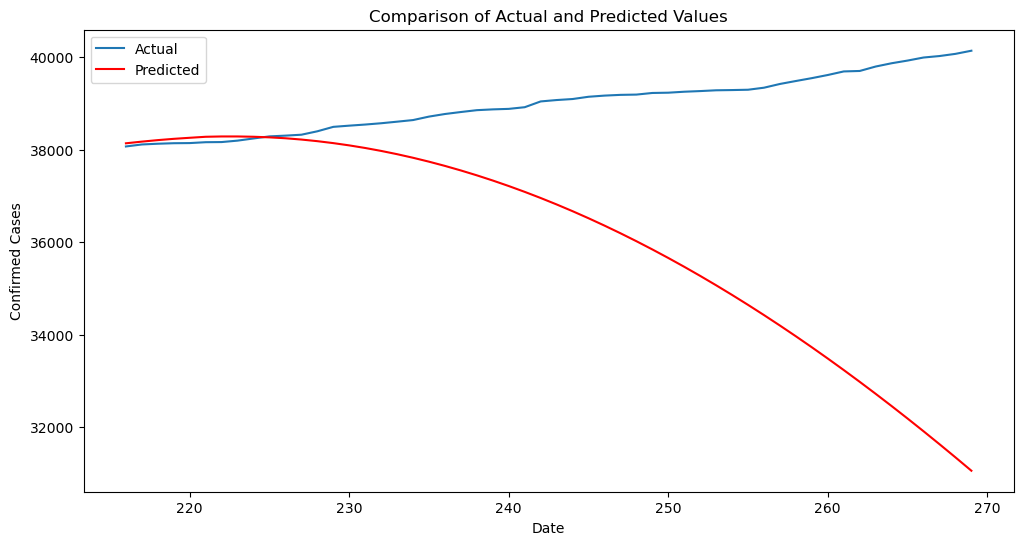

In [33]:
# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions_afghanistan, color='red', label='Predicted')
plt.legend()
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

- The actual values are consistently higher than the predicted values throughout the timeframe shown. This means that the model that generated the predicted values consistently underestimates the number of confirmed cases.

In [35]:
print(f"Mean Absoulte Error: {round(np.mean(abs(residual_afganistan/test_data)),4)}")
print(f"Root Mean Squared Error: {np.sqrt(np.mean(residual_afganistan**2))}")

Mean Absoulte Error: 0.0741
Root Mean Squared Error: 4036.049002971931


In [36]:
# Calculate RMSE
rmse = sqrt(mean_squared_error(test_data, predictions_afghanistan))
print(f'\nTest RMSE: {rmse:.3f}')


Test RMSE: 4036.049


### Bhutan

In [39]:
bhutan = saarc_data[saarc_data['Country/Region'] == 'Bhutan']['Confirmed']
bhutan

7020      0
7021      0
7022      0
7023      0
7024      0
       ... 
7285    313
7286    316
7287    316
7288    316
7289    325
Name: Confirmed, Length: 270, dtype: int64

In [47]:
# Check stationarity of Bhutan data
print('\nStationarity Test for Bhutan Data:')
check_stationarity(bhutan)


Stationarity Test for Bhutan Data:
ADF Statistic: 3.0323438586804756
p-value: 1.0
Critical Values:
	1%: -3.455365238788105
	5%: -2.8725510317187024
	10%: -2.5726375763314966


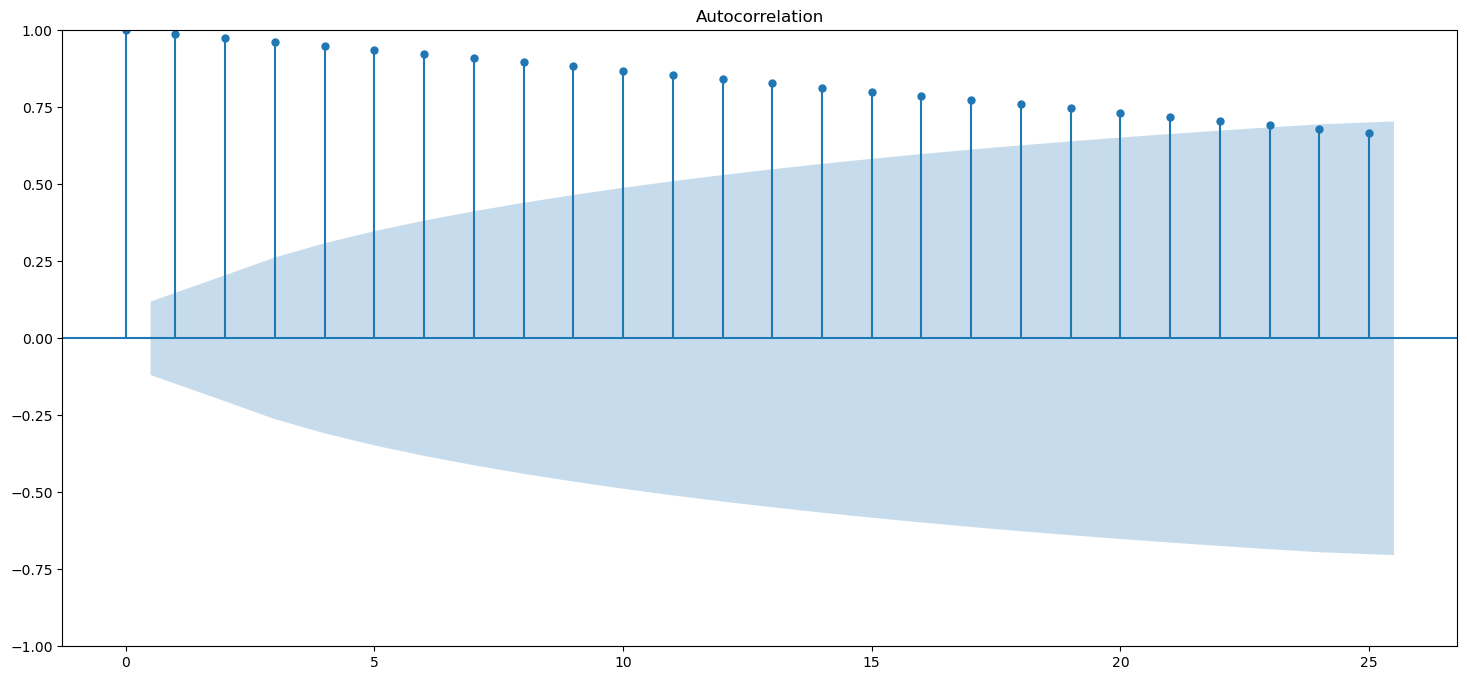

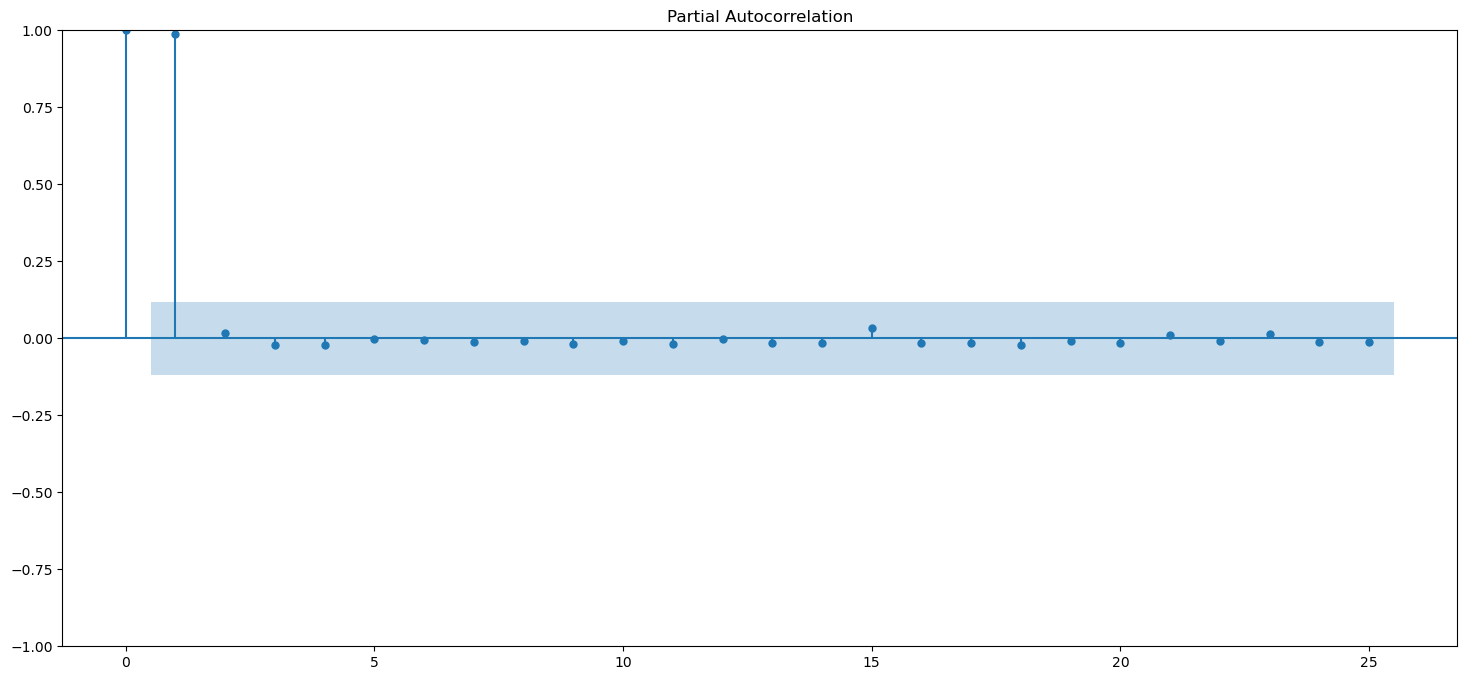

In [49]:
# Plot ACF and PACF for Bhutan data
plot_acf(bhutan)
plot_pacf(bhutan)
plt.show()

In [51]:
# Split the data into train and test sets for Bhutan
split_ratio = 0.8
split_index = int(len(bhutan) * split_ratio)
train_data, test_data = bhutan[:split_index], bhutan[split_index:]

In [52]:
# Set the lag value for Bhutan
lag_value = 6

# Fit the AR model for Bhutan
model_bhutan = AutoReg(train_data, lags=lag_value)
model_fit_bhutan = model_bhutan.fit()

C:\Users\sachu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [53]:

print(model_fit_bhutan.summary())

                            AutoReg Model Results                             
Dep. Variable:              Confirmed   No. Observations:                  216
Model:                     AutoReg(6)   Log Likelihood                -411.954
Method:               Conditional MLE   S.D. of innovations              1.721
Date:                Tue, 30 Apr 2024   AIC                            839.909
Time:                        10:54:38   BIC                            866.686
Sample:                             6   HQIC                           850.734
                                  216                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1846      0.159      1.161      0.246      -0.127       0.496
Confirmed.L1     1.0164      0.069     14.763      0.000       0.881       1.151
Confirmed.L2     0.1111      0.098      1.13

In [54]:
# Make predictions for Bhutan
n_train_bhutan = len(train_data)  
n_test_bhutan = len(test_data)
predictions_bhutan = model_fit_bhutan.predict(start=n_train_bhutan, end=n_train_bhutan + n_test_bhutan-1, dynamic=False)

C:\Users\sachu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sachu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


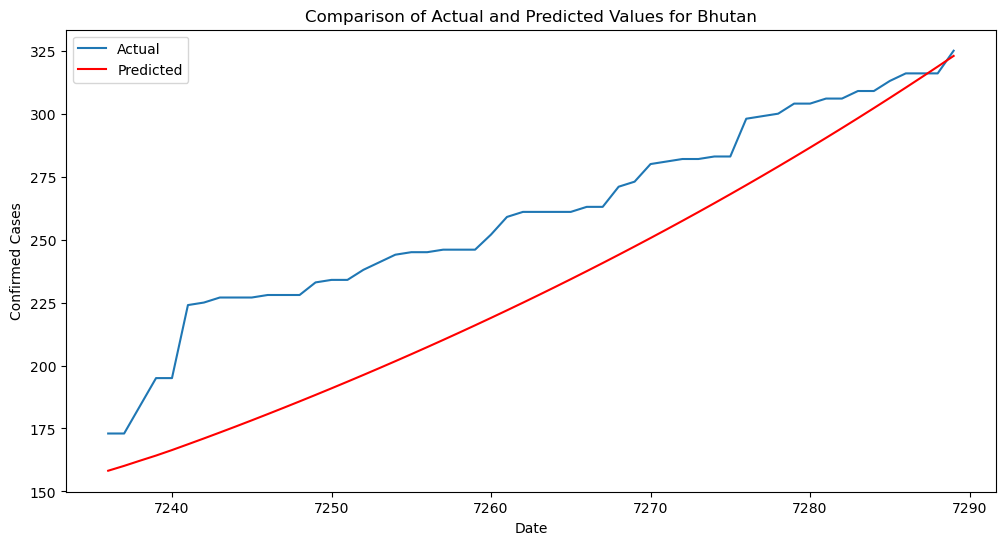

In [55]:
# Plot actual vs. predicted values for Bhutan
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions_bhutan, color='red', label='Predicted')
plt.legend()
plt.title('Comparison of Actual and Predicted Values for Bhutan')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

- The actual number of confirmed cases is consistently higher than the predicted number of confirmed cases. This means that the model that generated the predicted values consistently underestimates the number of confirmed cases.

In [56]:
# Calculate RMSE for Bhutan
rmse = sqrt(mean_squared_error(test_data, predictions_bhutan))
print(f'\nTest RMSE for Bhutan: {rmse:.3f}')


Test RMSE for Bhutan: 31.887


### Maldives

In [60]:
maldives = saarc_data[saarc_data['Country/Region'] == 'Maldives']['Confirmed']

In [62]:
# Check stationarity of Maldives data
print('\nStationarity Test for Maldives Data:')
check_stationarity(maldives)


Stationarity Test for Maldives Data:
ADF Statistic: -0.6067509784327823
p-value: 0.8694492739438079
Critical Values:
	1%: -3.455952927706342
	5%: -2.8728086526320302
	10%: -2.572774990685656


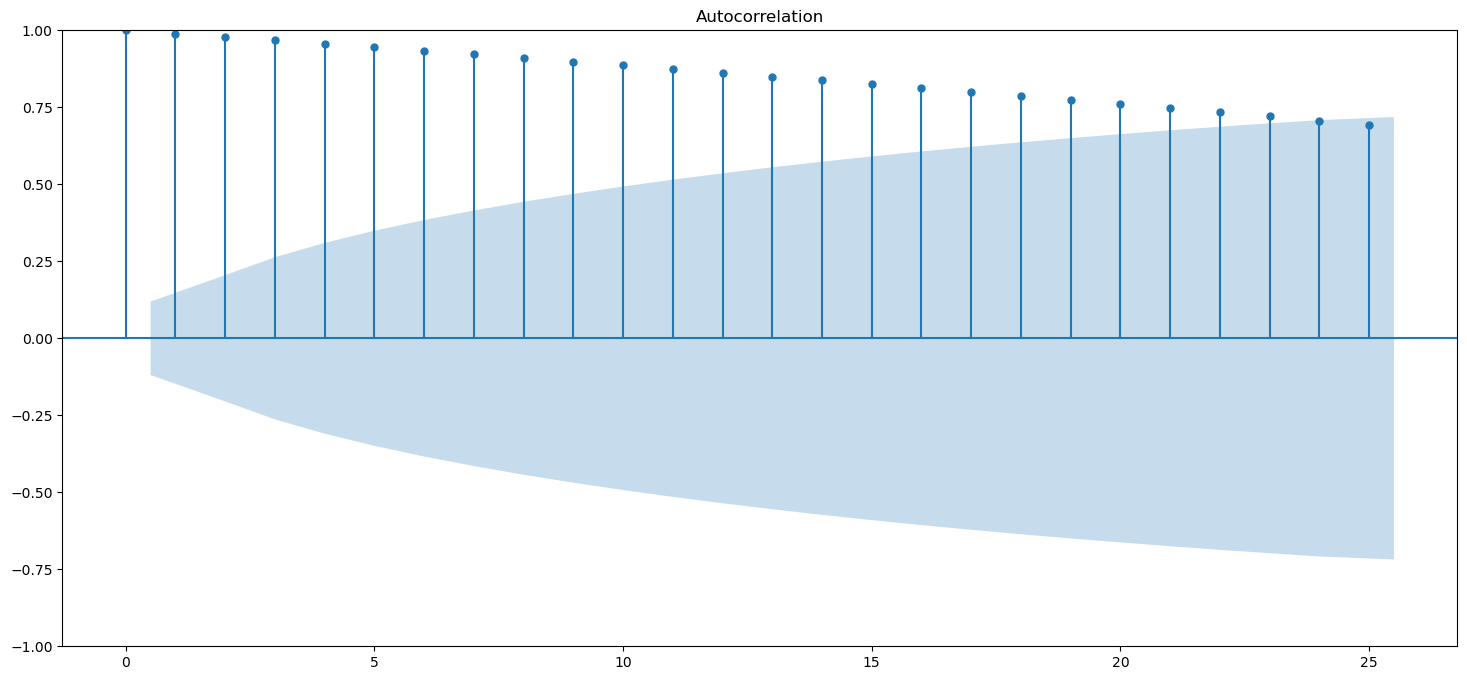

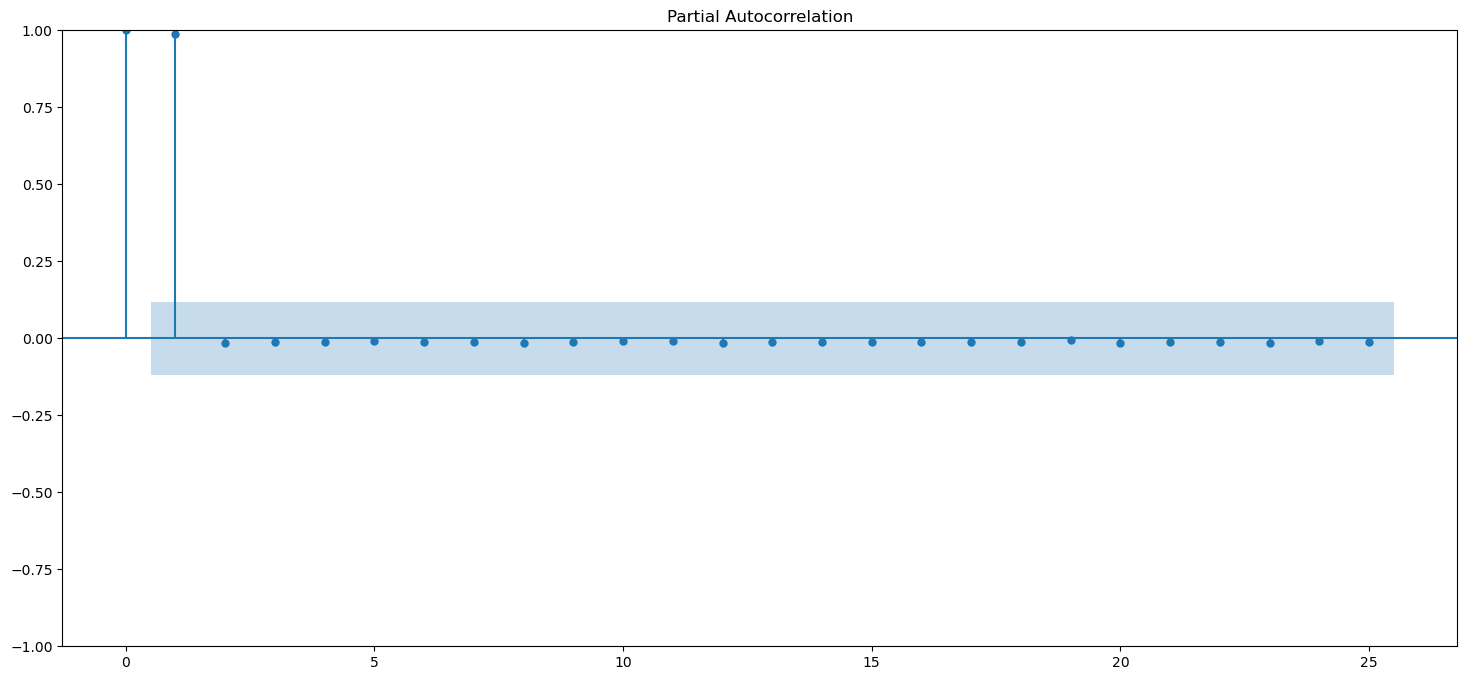

In [63]:
# Plot ACF and PACF for Maldives data
plot_acf(maldives)
plot_pacf(maldives)
plt.show()

In [64]:
# Split the data into train and test sets for Maldives
split_ratio = 0.8
split_index = int(len(maldives) * split_ratio)
train_data, test_data = maldives[:split_index], maldives[split_index:]

In [65]:
# Set the lag value for Maldives
lag_value = 6

# Fit the AR model for Maldives
model_maldives = AutoReg(train_data, lags=lag_value)
model_fit_maldives = model_maldives.fit()

C:\Users\sachu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [67]:
print(model_fit_maldives.summary())

                            AutoReg Model Results                             
Dep. Variable:              Confirmed   No. Observations:                  216
Model:                     AutoReg(6)   Log Likelihood                -959.823
Method:               Conditional MLE   S.D. of innovations             23.375
Date:                Tue, 30 Apr 2024   AIC                           1935.647
Time:                        10:58:00   BIC                           1962.424
Sample:                             6   HQIC                          1946.472
                                  216                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3458      2.113      0.637      0.524      -2.796       5.488
Confirmed.L1     1.2965      0.068     18.981      0.000       1.163       1.430
Confirmed.L2    -0.0845      0.112     -0.75

In [68]:
# Make predictions for Maldives
n_train_maldives = len(train_data)  
n_test_maldives = len(test_data)
predictions_maldives = model_fit_maldives.predict(start=n_train_maldives, end=n_train_maldives + n_test_maldives-1, dynamic=False)

C:\Users\sachu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sachu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


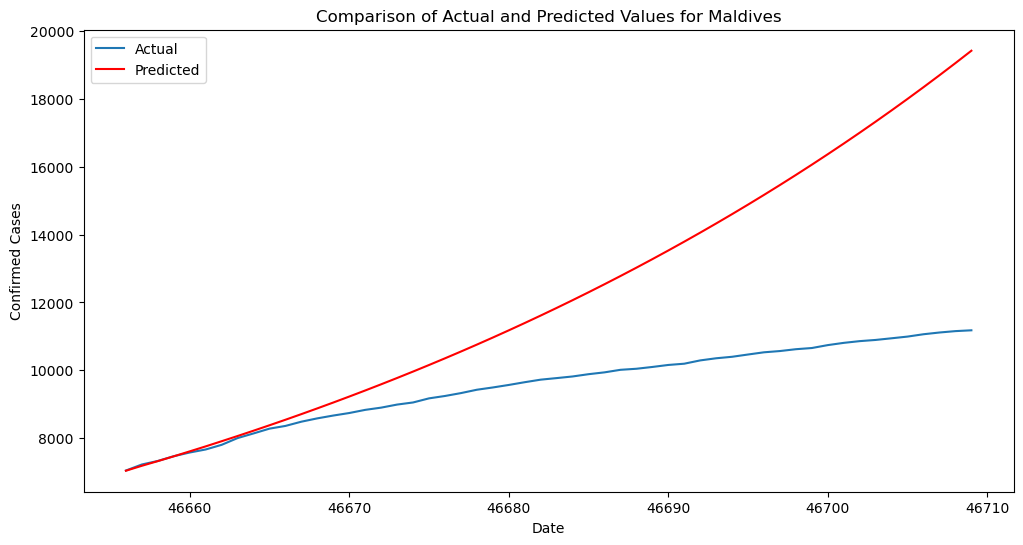

In [69]:
# Plot actual vs. predicted values for Maldives
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions_maldives, color='red', label='Predicted')
plt.legend()
plt.title('Comparison of Actual and Predicted Values for Maldives')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

In [70]:
# Calculate RMSE for Maldives
rmse = sqrt(mean_squared_error(test_data, predictions_maldives))
print(f'\nTest RMSE for Maldives: {rmse:.3f}')


Test RMSE for Maldives: 3702.720


### Nepal

In [71]:
nepal = saarc_data[saarc_data['Country/Region'] == 'Nepal']['Confirmed']

In [73]:
# Check stationarity of Nepal data
print('\nStationarity Test for Nepal Data:')
check_stationarity(nepal)


Stationarity Test for Nepal Data:
ADF Statistic: 2.8388581471760315
p-value: 1.0
Critical Values:
	1%: -3.4562572510874396
	5%: -2.8729420379793598
	10%: -2.5728461399461744


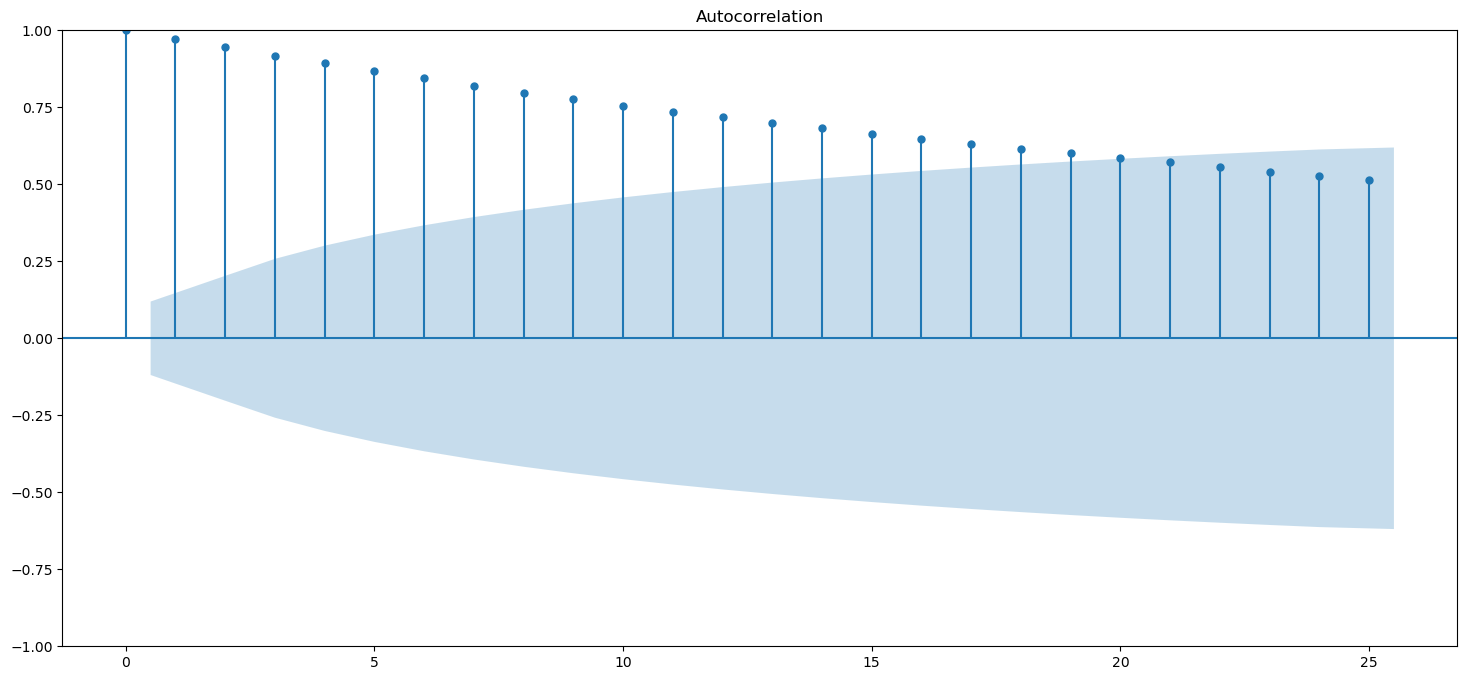

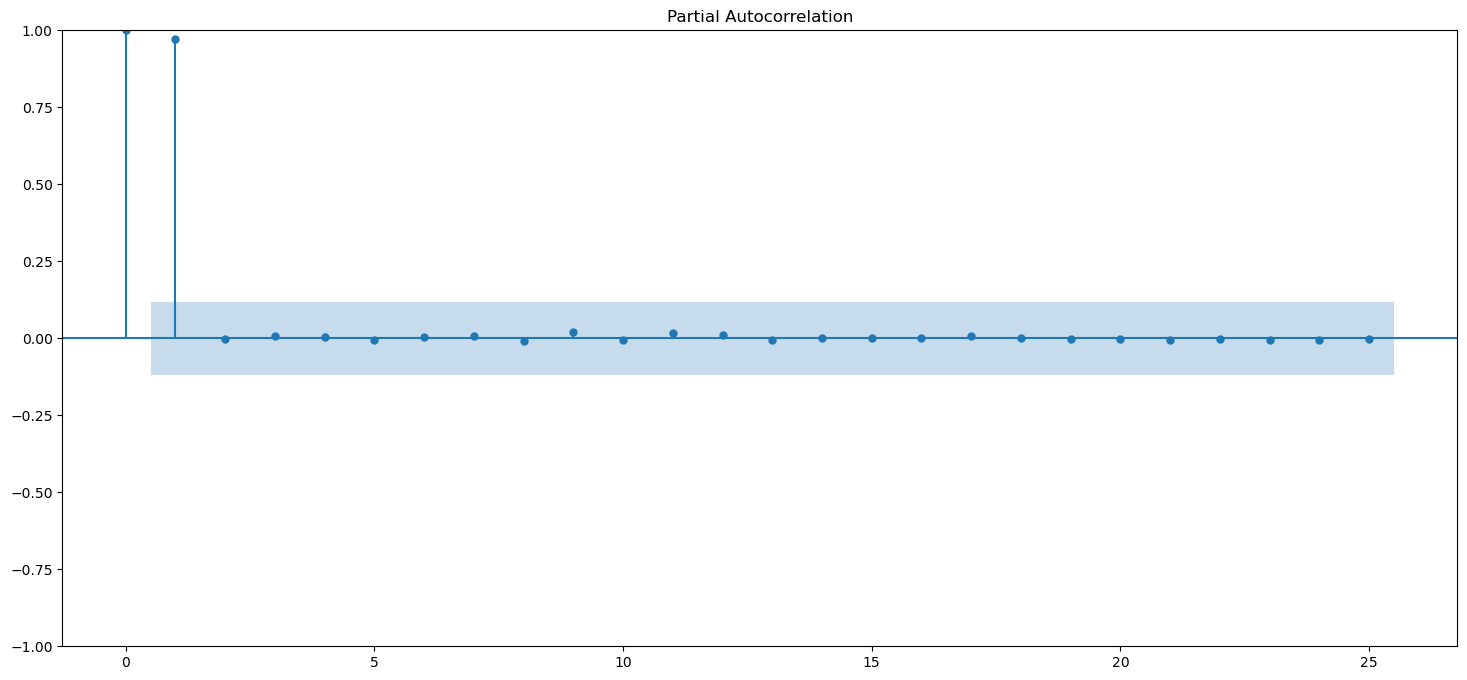

In [75]:
# Plot ACF and PACF for Nepal data
plot_acf(nepal)
plot_pacf(nepal)
plt.show()

In [76]:
# Split the data into train and test sets for Nepal
split_ratio = 0.8
split_index = int(len(nepal) * split_ratio)
train_data, test_data = nepal[:split_index], nepal[split_index:]

In [77]:
# Set the lag value for Nepal
lag_value = 6

# Fit the AR model for Nepal
model_nepal = AutoReg(train_data, lags=lag_value)
model_fit_nepal = model_nepal.fit()

C:\Users\sachu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [78]:
# Make predictions for Nepal
n_train_nepal = len(train_data)  
n_test_nepal = len(test_data)
predictions_nepal = model_fit_nepal.predict(start=n_train_nepal, end=n_train_nepal + n_test_nepal-1, dynamic=False)

C:\Users\sachu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sachu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


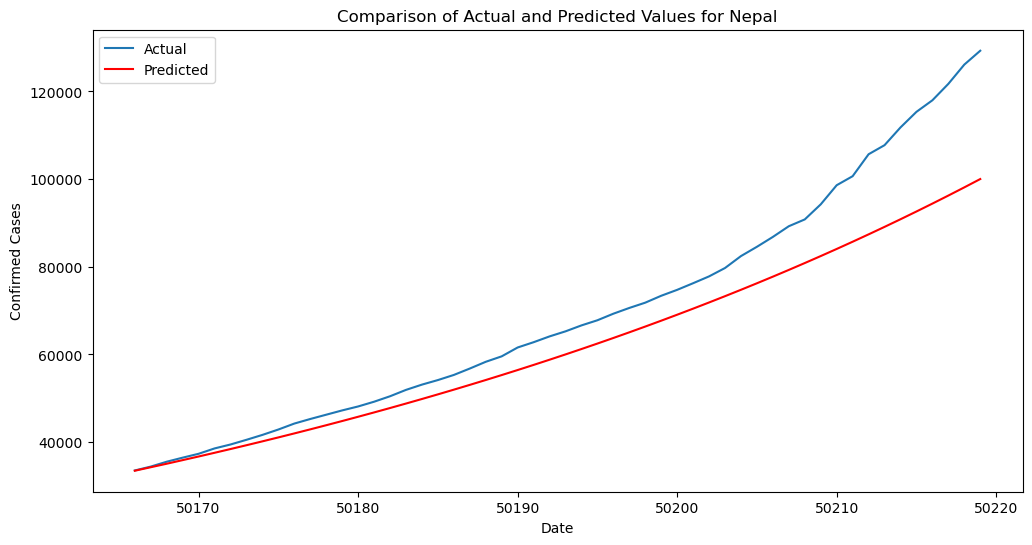

In [79]:
# Plot actual vs. predicted values for Nepal
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions_nepal, color='red', label='Predicted')
plt.legend()
plt.title('Comparison of Actual and Predicted Values for Nepal')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

- The actual values are consistently higher than the predicted values throughout the timeframe shown. This means that the model that generated the predicted values consistently underestimates the number of confirmed cases.

In [80]:
# Calculate RMSE for Nepal
rmse = sqrt(mean_squared_error(test_data, predictions_nepal))
print(f'\nTest RMSE for Nepal: {rmse:.3f}')


Test RMSE for Nepal: 10579.357


### India

In [81]:
india = saarc_data[saarc_data['Country/Region'] == 'India']['Confirmed']

In [82]:
# Check stationarity of India data
print('\nStationarity Test for India Data:')
check_stationarity(india)


Stationarity Test for India Data:
ADF Statistic: -4.323647107922234
p-value: 0.00040414180022578663
Critical Values:
	1%: -3.4564641849494113
	5%: -2.873032730098417
	10%: -2.572894516864816


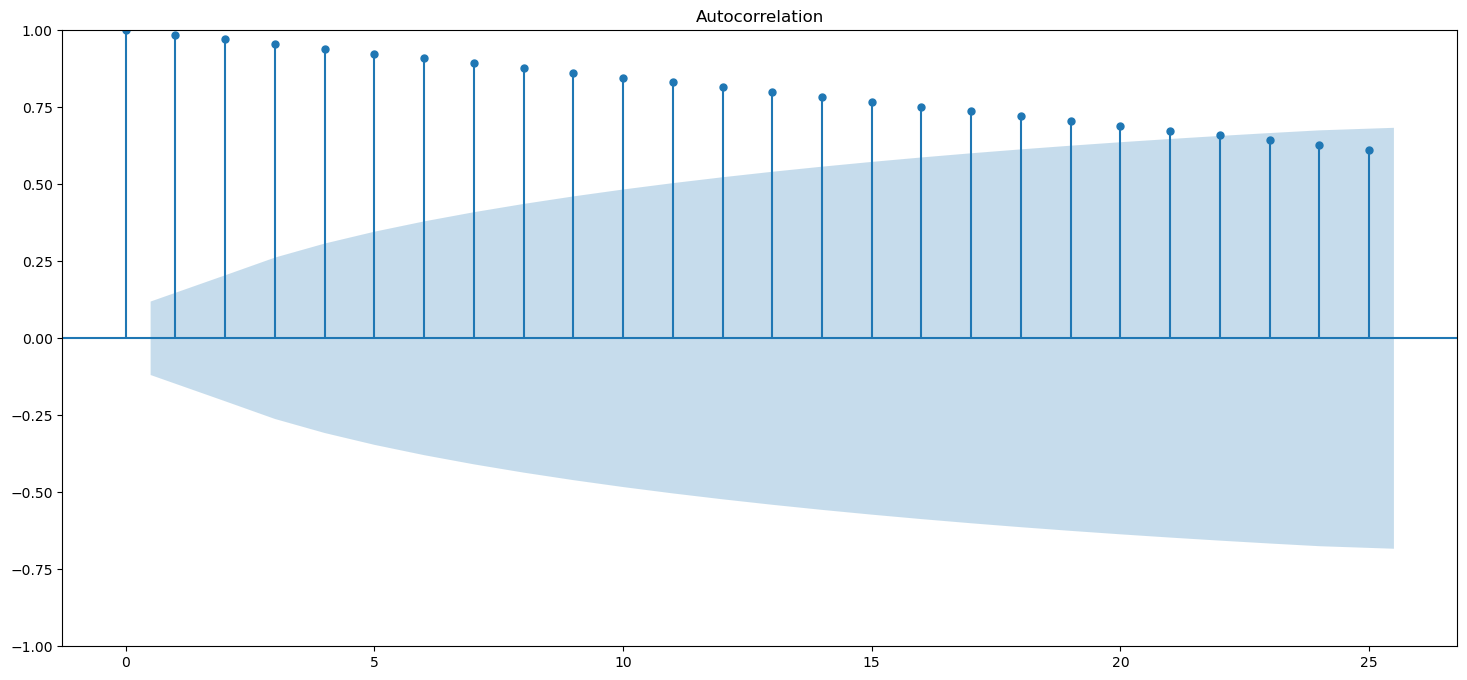

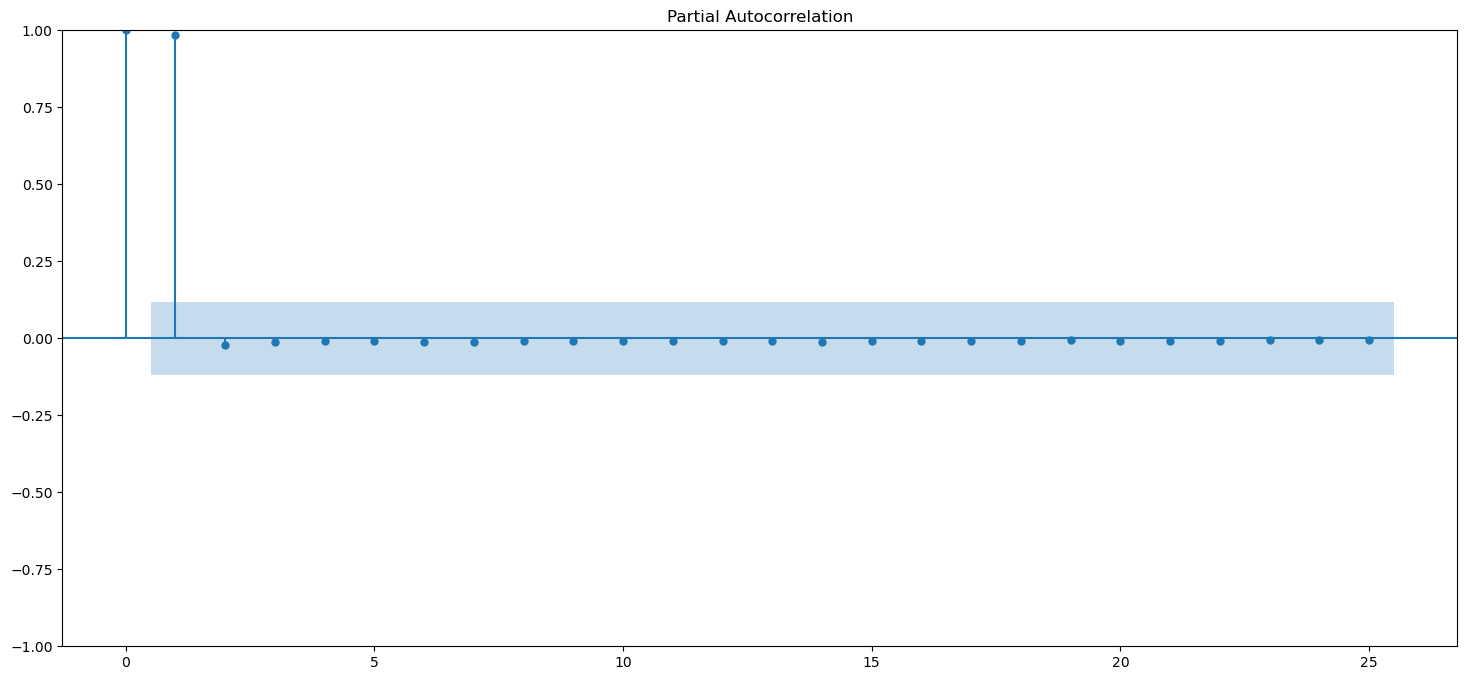

In [83]:
# Plot ACF and PACF for India data
plot_acf(india)
plot_pacf(india)
plt.show()

In [84]:
# Split the data into train and test sets for India
split_ratio = 0.8
split_index = int(len(india) * split_ratio)
train_data, test_data = india[:split_index], india[split_index:]

In [85]:
# Set the lag value for India
lag_value = 6

# Fit the AR model for India
model_india = AutoReg(train_data, lags=lag_value)
model_fit_india = model_india.fit()

C:\Users\sachu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [86]:
print(model_fit_india.summary())

                            AutoReg Model Results                             
Dep. Variable:              Confirmed   No. Observations:                  216
Model:                     AutoReg(6)   Log Likelihood               -1855.623
Method:               Conditional MLE   S.D. of innovations           1664.634
Date:                Tue, 30 Apr 2024   AIC                           3727.246
Time:                        11:02:26   BIC                           3754.022
Sample:                             6   HQIC                          3738.070
                                  216                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          120.0180    147.730      0.812      0.417    -169.527     409.563
Confirmed.L1     1.9853      0.060     32.989      0.000       1.867       2.103
Confirmed.L2    -1.4182      0.134    -10.55

In [87]:
# Make predictions for India
n_train_india = len(train_data)  
n_test_india = len(test_data)
predictions_india = model_fit_india.predict(start=n_train_india, end=n_train_india + n_test_india-1, dynamic=False)

C:\Users\sachu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sachu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


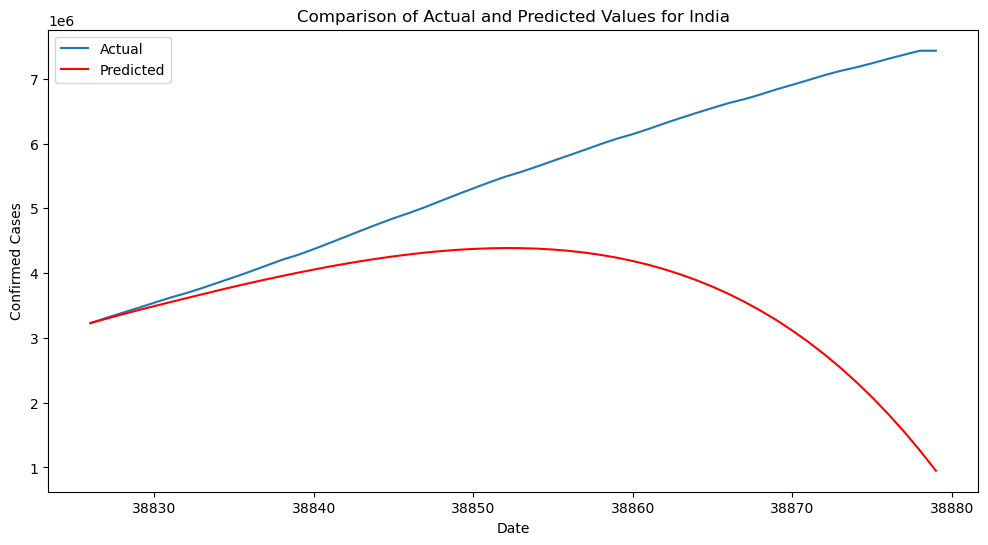

In [88]:
# Plot actual vs. predicted values for India
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions_india, color='red', label='Predicted')
plt.legend()
plt.title('Comparison of Actual and Predicted Values for India')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

- The actual values are consistently higher than the predicted values throughout the timeframe shown. This means that the model that generated the predicted values consistently underestimates the number of confirmed cases.

In [89]:
# Calculate RMSE for India
rmse = sqrt(mean_squared_error(test_data, predictions_india))
print(f'\nTest RMSE for India: {rmse:.3f}')


Test RMSE for India: 2591702.172


### Pakistan

In [90]:
pakistan = saarc_data[saarc_data['Country/Region'] == 'Pakistan']['Confirmed']

In [91]:
# Check stationarity of Pakistan data
print('\nStationarity Test for Pakistan Data:')
check_stationarity(pakistan)


Stationarity Test for Pakistan Data:
ADF Statistic: -1.6794657483228803
p-value: 0.4417221812677248
Critical Values:
	1%: -3.455365238788105
	5%: -2.8725510317187024
	10%: -2.5726375763314966


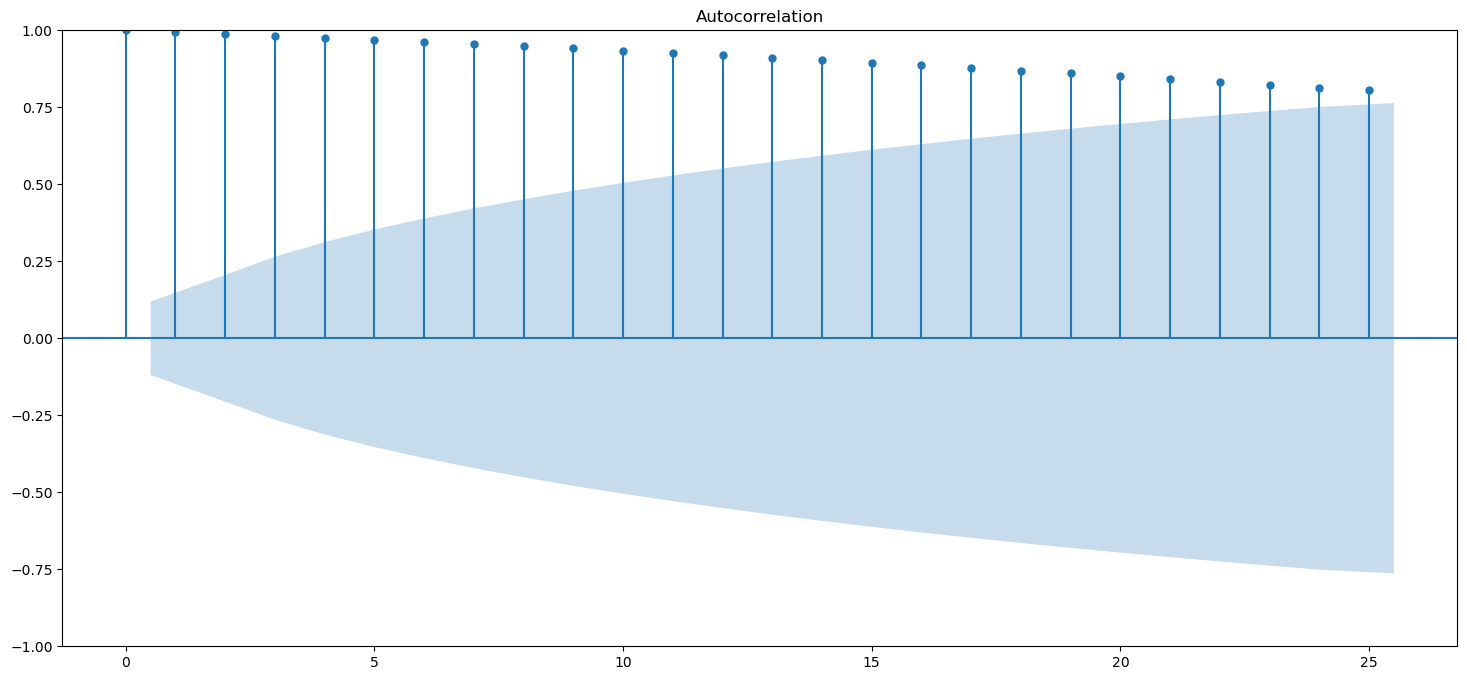

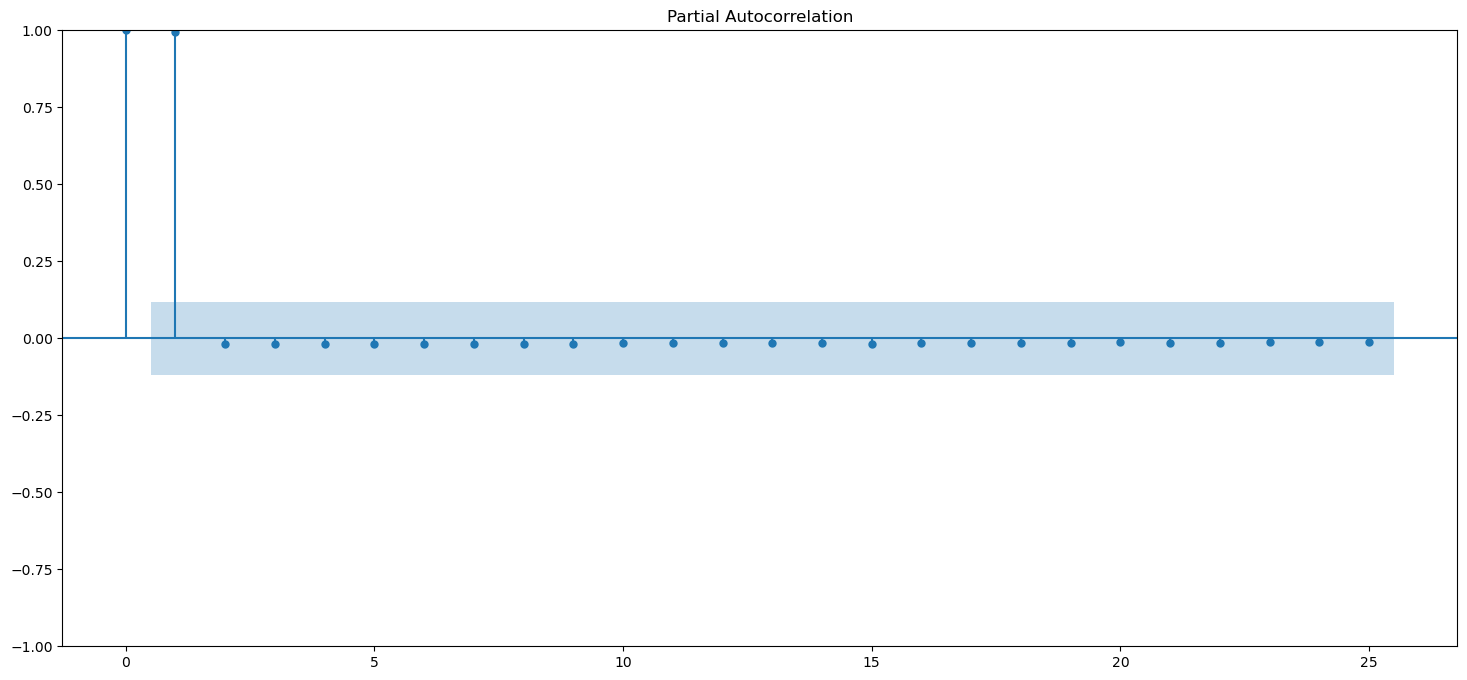

In [92]:
# Plot ACF and PACF for Pakistan data
plot_acf(pakistan)
plot_pacf(pakistan)
plt.show()

In [93]:
# Split the data into train and test sets for Pakistan
split_ratio = 0.8
split_index = int(len(pakistan) * split_ratio)
train_data, test_data = pakistan[:split_index], pakistan[split_index:]

In [94]:
# Set the lag value for Pakistan
lag_value = 6

# Fit the AR model for Pakistan
model_pakistan = AutoReg(train_data, lags=lag_value)
model_fit_pakistan = model_pakistan.fit()

C:\Users\sachu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [95]:
# Make predictions for Pakistan
n_train_pakistan = len(train_data)  
n_test_pakistan = len(test_data)
predictions_pakistan = model_fit_pakistan.predict(start=n_train_pakistan, end=n_train_pakistan + n_test_pakistan-1, dynamic=False)

C:\Users\sachu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sachu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


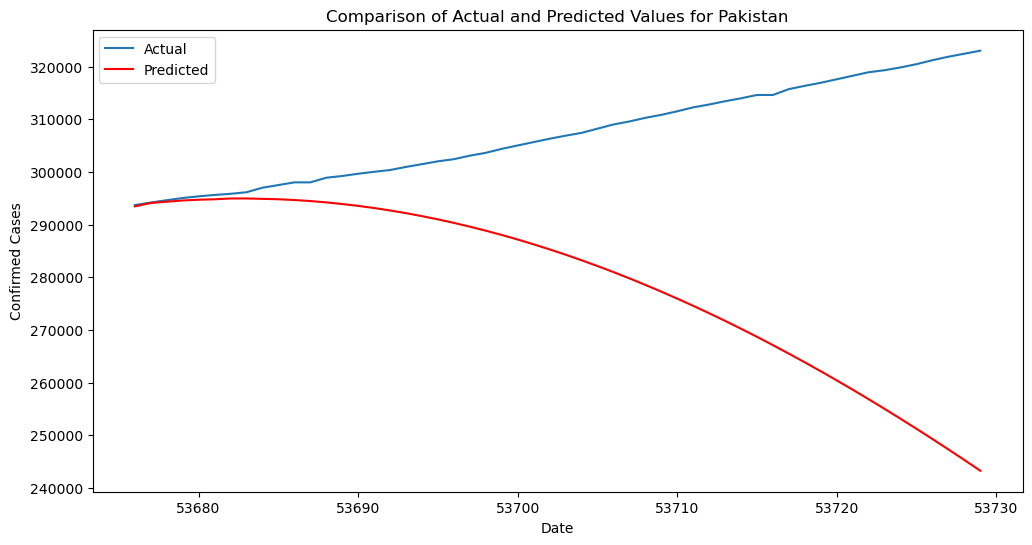

In [96]:
# Plot actual vs. predicted values for Pakistan
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions_pakistan, color='red', label='Predicted')
plt.legend()
plt.title('Comparison of Actual and Predicted Values for Pakistan')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

- The actual values are consistently higher than the predicted values throughout the timeframe shown. This means that the model that generated the predicted values consistently underestimates the number of confirmed cases

In [97]:
# Calculate RMSE for Pakistan
rmse = sqrt(mean_squared_error(test_data, predictions_pakistan))
print(f'\nTest RMSE for Pakistan: {rmse:.3f}')


Test RMSE for Pakistan: 37441.804
